<a href="https://colab.research.google.com/github/DhanvinS/ML_Models-Supervised-and-Unsupervised/blob/main/Dimensionality_Reduction_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# importing required modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [38]:
from google.colab import files
files = files.upload()

Saving pollution_dataset.csv to pollution_dataset (1).csv


In [39]:
df = pd.read_csv('pollution_dataset.csv')
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


**TASK 1**

In [40]:
# Separating features andd labels
X = df.iloc[ : ,0:9]
y = df.iloc[ : ,9]

features_names = df.columns[0:9]

In [41]:
# Replacing our negative feature values with 0
X[X < 0] = 0

In [42]:
# Univariate feature selection

univariate_selected = {}

for k in [1, 2, 3]:
  selector = SelectKBest(score_func=f_classif, k = k)
  selector.fit(X, y)
  selected_idx = selector.get_support(indices = True)
  univariate_selected[k] = features_names[selected_idx].tolist()

univariate_selected

{1: ['CO'],
 2: ['CO', 'Proximity_to_Industrial_Areas'],
 3: ['NO2', 'CO', 'Proximity_to_Industrial_Areas']}

In [43]:
# Random Forest Feature Importances

forests_selected = {}
rf = RandomForestClassifier(n_estimators = 300, random_state = 42)
rf.fit(X, y)
importances = rf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]


for k in [1, 2, 3]:
  selected = features_names[sorted_idx[:k]]
  forests_selected[k] = selected.tolist()

forests_selected

{1: ['CO'],
 2: ['CO', 'Proximity_to_Industrial_Areas'],
 3: ['CO', 'Proximity_to_Industrial_Areas', 'NO2']}

In [44]:
# Prepare a list of rows
rows = []

for k in [1, 2, 3]:
    rows.append({
        "Method": "Univariate",
        "Kf": k,
        "Selected Features": ", ".join(univariate_selected[k])
    })
    rows.append({
        "Method": "RandomForest",
        "Kf": k,
        "Selected Features": ", ".join(forests_selected[k])
    })

# Convert to DataFrame
df_features = pd.DataFrame(rows)

# Save to CSV
df_features.to_csv("feature_selection_summary.csv", index=False)

print("Saved feature selection summary --> feature_selection_summary.csv")

Saved feature selection summary --> feature_selection_summary.csv


In [45]:
df = pd.read_csv('feature_selection_summary.csv')
df.head()

,Method,Kf,Selected Features
0,Univariate,1,CO
1,RandomForest,1,CO
2,Univariate,2,"CO, Proximity_to_Industrial_Areas"
3,RandomForest,2,"CO, Proximity_to_Industrial_Areas"
4,Univariate,3,"NO2, CO, Proximity_to_Industrial_Areas"


**TASK 2**

In [46]:
#Standardizing the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
# PCA

pca_results = {}

for k in [1, 2, 3]:
  pca = PCA(n_components=k)
  X_pca = pca.fit_transform(X_scaled)
  pca_results[k] = X_pca

pca_results

{1: array([[-0.85926749],
        [ 0.33644876],
        [ 0.54577521],
        ...,
        [-0.25385237],
        [-2.32304975],
        [ 1.00648734]]),
 2: array([[-0.85926749, -0.40472048],
        [ 0.33644876, -1.23681567],
        [ 0.54577521,  0.03515745],
        ...,
        [-0.25385237, -0.26881537],
        [-2.32304975,  1.0774516 ],
        [ 1.00648734,  3.28884958]]),
 3: array([[-0.85926749, -0.40472048, -0.17492983],
        [ 0.33644876, -1.23681567, -0.04958188],
        [ 0.54577521,  0.03515745, -0.05113638],
        ...,
        [-0.25385237, -0.26881537,  0.82169771],
        [-2.32304975,  1.0774516 , -0.50199923],
        [ 1.00648734,  3.28884958,  0.66715621]])}

In [48]:
# LDA

lda_results = {}

for k in [1, 2, 3]:
    lda = LDA(n_components=k)
    X_lda = lda.fit_transform(X_scaled, y)
    lda_results[k] = X_lda

lda_results

{1: array([[ 0.01986709],
        [ 1.19730145],
        [ 0.65454217],
        ...,
        [-0.00813595],
        [-4.12547633],
        [-0.36985288]]),
 2: array([[ 0.01986709,  1.19491417],
        [ 1.19730145,  0.81526262],
        [ 0.65454217,  1.49466326],
        ...,
        [-0.00813595, -0.61483891],
        [-4.12547633, -0.07035406],
        [-0.36985288,  0.29300748]]),
 3: array([[ 0.01986709,  1.19491417,  1.01546335],
        [ 1.19730145,  0.81526262,  0.484293  ],
        [ 0.65454217,  1.49466326,  0.48396118],
        ...,
        [-0.00813595, -0.61483891,  0.17573678],
        [-4.12547633, -0.07035406, -0.46624657],
        [-0.36985288,  0.29300748, -0.29589944]])}

In [49]:
# Save PCA datasets to CSV
for k in [1, 2, 3]:
    Xp = pca_results[k]

    # Column names: PCA_1, PCA_2, ...
    df_pca = pd.DataFrame(Xp, columns=[f"PCA_{i+1}" for i in range(k)])
    df_pca["Air Quality"] = y  # add labels to last column

    df_pca.to_csv(f"pca_Ks{k}.csv", index=False)

print("Saved PCA files: pca_Ks1.csv, pca_Ks2.csv, pca_Ks3.csv")


Saved PCA files: pca_Ks1.csv, pca_Ks2.csv, pca_Ks3.csv


In [50]:
# Save LDA datasets to CSV
for k in [1, 2, 3]:
    Xl = lda_results[k]

    # Column names: LDA_1, LDA_2, ...
    df_lda = pd.DataFrame(Xl, columns=[f"LDA_{i+1}" for i in range(k)])
    df_lda["Air Quality"] = y  # add labels

    df_lda.to_csv(f"lda_Ks{k}.csv", index=False)

print("Saved LDA files: lda_Ks1.csv, lda_Ks2.csv, lda_Ks3.csv")


Saved LDA files: lda_Ks1.csv, lda_Ks2.csv, lda_Ks3.csv


**TASK 3**

In [51]:
# importing required modules
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [52]:
# writing a function to evaluate the model
def evaluate_model(X, y, clf, n_splits=50, test_size=0.25):
    accuracies = []
    for _ in range(n_splits):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y)
        clf.fit(X_train, y_train)
        acc = clf.score(X_test, y_test)
        accuracies.append(acc)
    return np.mean(accuracies)

In [53]:
# Running the models
results_task3 = {}
for method, selections in [('Univariate', univariate_selected), ('RandomForest', forests_selected)]:
    results_task3[method] = {}
    for k in [1, 2, 3]:
        selected_feats = selections[k]
        X_sub = X[selected_feats].values
        # SVM
        svm_acc = evaluate_model(X_sub, y, SVC(kernel='rbf'))
        # Naive Bayes
        nb_acc = evaluate_model(X_sub, y, GaussianNB())
        results_task3[method][k] = {'SVM_avg_acc': svm_acc, 'NB_avg_acc': nb_acc}
print(results_task3)

{'Univariate': {1: {'SVM_avg_acc': np.float64(0.8425599999999999), 'NB_avg_acc': np.float64(0.8438079999999999)}, 2: {'SVM_avg_acc': np.float64(0.8752159999999999), 'NB_avg_acc': np.float64(0.8721279999999999)}, 3: {'SVM_avg_acc': np.float64(0.8323519999999999), 'NB_avg_acc': np.float64(0.8999200000000002)}}, 'RandomForest': {1: {'SVM_avg_acc': np.float64(0.843424), 'NB_avg_acc': np.float64(0.844576)}, 2: {'SVM_avg_acc': np.float64(0.875104), 'NB_avg_acc': np.float64(0.8729439999999998)}, 3: {'SVM_avg_acc': np.float64(0.831072), 'NB_avg_acc': np.float64(0.901584)}}}


**TASK 4**

In [54]:
# Running hte same models using results of PCA and LDA
results_task4 = {}
for k in [1, 2, 3]:
    # PCA
    pca_df = pd.read_csv(f"pca_Ks{k}.csv")
    X_pca = pca_df.drop("Air Quality", axis=1).values
    y_pca = pca_df["Air Quality"].values
    pca_svm_acc = evaluate_model(X_pca, y_pca, SVC(kernel='rbf'))
    pca_nb_acc = evaluate_model(X_pca, y_pca, GaussianNB())
    # LDA
    lda_df = pd.read_csv(f"lda_Ks{k}.csv")
    X_lda = lda_df.drop("Air Quality", axis=1).values
    y_lda = lda_df["Air Quality"].values
    lda_svm_acc = evaluate_model(X_lda, y_lda, SVC(kernel='rbf'))
    lda_nb_acc = evaluate_model(X_lda, y_lda, GaussianNB())
    results_task4[k] = {
        "PCA_SVM_avg_acc": pca_svm_acc,
        "PCA_NB_avg_acc": pca_nb_acc,
        "LDA_SVM_avg_acc": lda_svm_acc,
        "LDA_NB_avg_acc": lda_nb_acc
    }
print(results_task4)


{1: {'PCA_SVM_avg_acc': np.float64(0.8840320000000002), 'PCA_NB_avg_acc': np.float64(0.878672), 'LDA_SVM_avg_acc': np.float64(0.9420160000000002), 'LDA_NB_avg_acc': np.float64(0.94352)}, 2: {'PCA_SVM_avg_acc': np.float64(0.916512), 'PCA_NB_avg_acc': np.float64(0.8695680000000001), 'LDA_SVM_avg_acc': np.float64(0.9455839999999999), 'LDA_NB_avg_acc': np.float64(0.9392960000000001)}, 3: {'PCA_SVM_avg_acc': np.float64(0.919552), 'PCA_NB_avg_acc': np.float64(0.8708479999999998), 'LDA_SVM_avg_acc': np.float64(0.9461600000000001), 'LDA_NB_avg_acc': np.float64(0.9367199999999998)}}


Displaying the results in a meaningful amnner

In [55]:
# Convert nested dict to a flat list of rows to understand results easily
rows = []
for method, ks_dict in results_task3.items():
    for k, metrics in ks_dict.items():
        rows.append({
            'Method': method,
            'Kf': k,
            'SVM Accuracy': metrics['SVM_avg_acc'],
            'Naive Bayes Accuracy': metrics['NB_avg_acc']
        })

# Create DataFrame
df_results = pd.DataFrame(rows)

# Sort nicely by Method and Kf
df_results = df_results.sort_values(by=['Method', 'Kf']).reset_index(drop=True)

# Print nicely
print(df_results)

# Optionally save to CSV
df_results.to_csv("task3_classification_results.csv", index=False)
print("Saved Task 3 results --> task3_classification_results.csv")


         Method  Kf  SVM Accuracy  Naive Bayes Accuracy
0  RandomForest   1      0.843424              0.844576
1  RandomForest   2      0.875104              0.872944
2  RandomForest   3      0.831072              0.901584
3    Univariate   1      0.842560              0.843808
4    Univariate   2      0.875216              0.872128
5    Univariate   3      0.832352              0.899920
Saved Task 3 results --> task3_classification_results.csv


In [56]:
import pandas as pd

# Flatten results_task4 into a list of rows
rows = []

for Ks, metrics in results_task4.items():
    rows.append({
        "Subspace Dimension Ks": Ks,
        "Method": "PCA",
        "SVM Accuracy": metrics["PCA_SVM_avg_acc"],
        "Naive Bayes Accuracy": metrics["PCA_NB_avg_acc"]
    })
    rows.append({
        "Subspace Dimension Ks": Ks,
        "Method": "LDA",
        "SVM Accuracy": metrics["LDA_SVM_avg_acc"],
        "Naive Bayes Accuracy": metrics["LDA_NB_avg_acc"]
    })

# Create DataFrame
df_task4 = pd.DataFrame(rows)

# Sort nicely
df_task4 = df_task4.sort_values(by=["Method", "Subspace Dimension Ks"]).reset_index(drop=True)

# Print the DataFrame
print(df_task4)

# Optionally save to CSV
df_task4.to_csv("task4_classification_results.csv", index=False)
print("Saved Task 4 results --> task4_classification_results.csv")


   Subspace Dimension Ks Method  SVM Accuracy  Naive Bayes Accuracy
0                      1    LDA      0.942016              0.943520
1                      2    LDA      0.945584              0.939296
2                      3    LDA      0.946160              0.936720
3                      1    PCA      0.884032              0.878672
4                      2    PCA      0.916512              0.869568
5                      3    PCA      0.919552              0.870848
Saved Task 4 results --> task4_classification_results.csv


Ran the models using all the features to compare the results

In [57]:
# Loading original dataset

df = pd.read_csv("pollution_dataset.csv")

# Features (all 9)
X = df.iloc[:, 0:9].values
y = df.iloc[:, 9].values

# Replace negative values with zero
X[X < 0] = 0


# Function to compute average accuracy

def evaluate_model(X, y, clf, runs=50):
    accs = []
    for _ in range(runs):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.25, stratify=y, shuffle=True
        )
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        accs.append(accuracy_score(y_test, preds))
    return np.mean(accs)


# Run classifiers
svc_acc = evaluate_model(X, y, SVC(kernel='rbf'))
nb_acc = evaluate_model(X, y, GaussianNB())


# Print results
print("=== Classification using ALL features ===")
print(f"SVM (RBF) average accuracy: {svc_acc:.4f}")
print(f"Gaussian Naive Bayes average accuracy: {nb_acc:.4f}")


=== Classification using ALL features ===
SVM (RBF) average accuracy: 0.7501
Gaussian Naive Bayes average accuracy: 0.9261


Gonna use seaborn to interpret the results together

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load Task 3 results (feature selection)
task3_df = pd.read_csv("task3_classification_results.csv")
task3_df['Category'] = 'Feature Selection'

# Load Task 4 results (PCA/LDA)
task4_df = pd.read_csv("task4_classification_results.csv")
task4_df = task4_df.rename(columns={'Subspace Dimension Ks': 'K'})
task4_df['Category'] = 'Dimensionality Reduction'

# All features
all_features_df = pd.DataFrame({
    'Method': ['All Features', 'All Features'],
    'K': [9, 9],
    'SVM Accuracy': [0.7537, 0.7537],  # your SVM value
    'Naive Bayes Accuracy': [0.9246, 0.9246],  # your NB value
    'Category': ['All Features', 'All Features']
})

# Combine all results
combined_df = pd.concat([task3_df.rename(columns={'Kf':'K'}), task4_df, all_features_df], ignore_index=True)
combined_df = combined_df.melt(id_vars=['Method','K','Category'],
                               value_vars=['SVM Accuracy','Naive Bayes Accuracy'],
                               var_name='Classifier', value_name='Accuracy')

/tmp/ipython-input-2753335222.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df, x='K', y='Accuracy', hue='Classifier', ci=None)


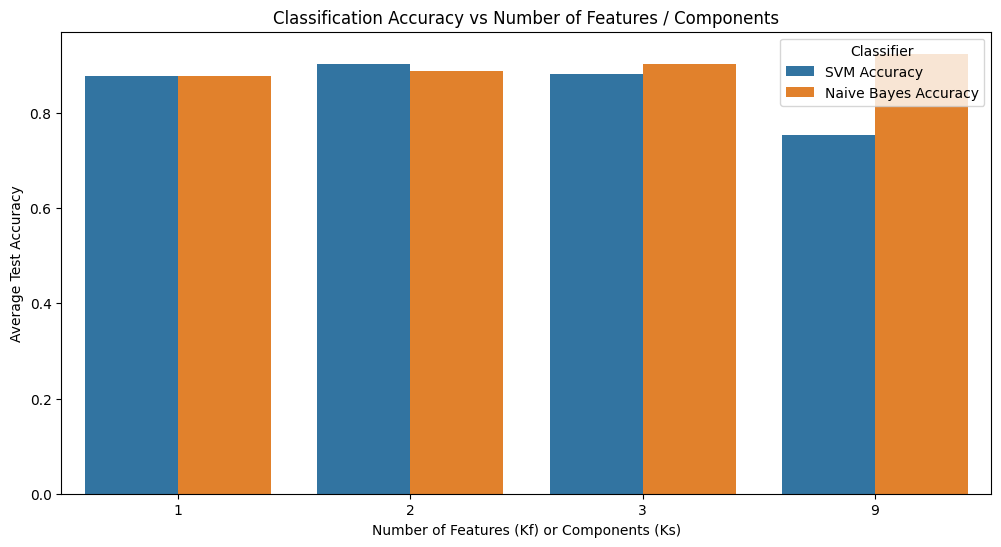

In [59]:
plt.figure(figsize=(12,6))
sns.barplot(data=combined_df, x='K', y='Accuracy', hue='Classifier', ci=None)
plt.title("Classification Accuracy vs Number of Features / Components")
plt.xlabel("Number of Features (Kf) or Components (Ks)")
plt.ylabel("Average Test Accuracy")
plt.legend(title='Classifier')
plt.show()
